___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib notebook

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape, df.size

((10000, 13), 130000)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [9]:
# I will drop some columns that won't be useful

del df['CustomerId'], df['Surname']

***object type columns***

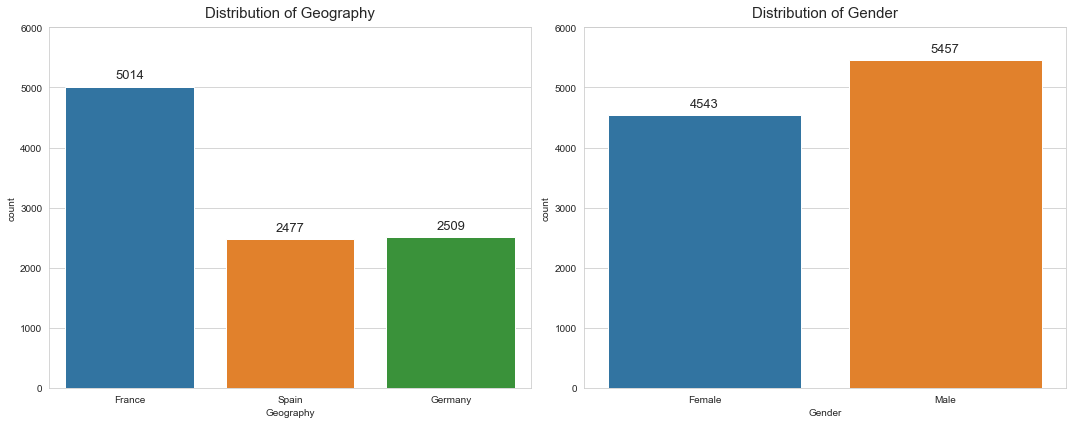

In [10]:
index = 0
plt.figure(figsize=(15,6))
for col in df.select_dtypes('O').columns:    
    index += 1
    plt.subplot(1,2,index)
    a = sns.countplot(data=df, x=col)
    a.bar_label(a.containers[0], fontsize=13, padding=5)
    plt.title(f'Distribution of {col}', fontsize=15, pad=10)
    plt.ylim(0, 6000)
plt.tight_layout()

***numeric columns-1***

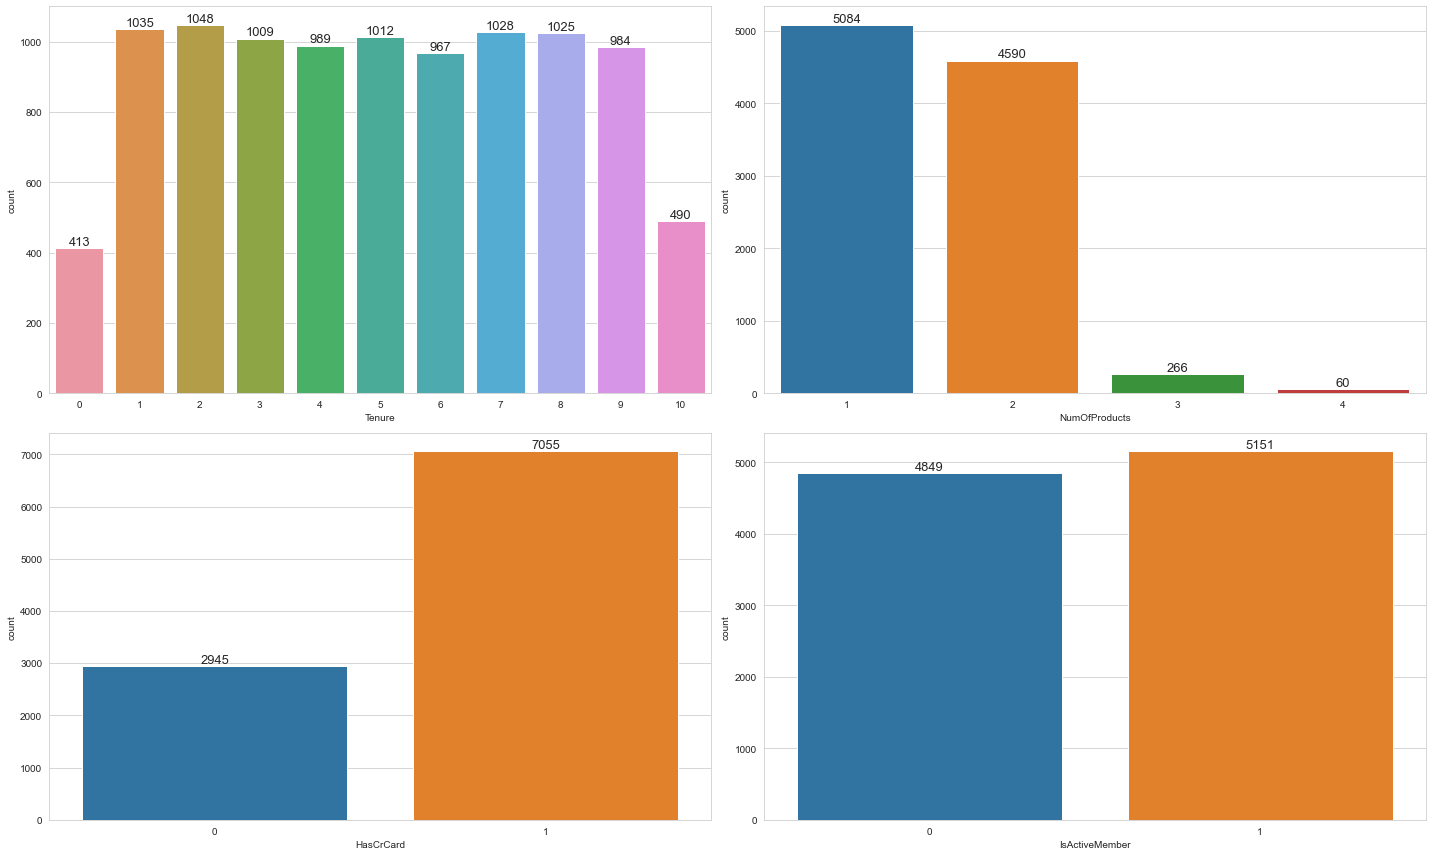

In [11]:
columns = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
index = 0
plt.figure(figsize=(20,12))
for col in columns:    
    index += 1
    plt.subplot(2,2,index)
    a = sns.countplot(data=df, x=col)
    a.bar_label(a.containers[0], fontsize=13)
plt.tight_layout()

***numeric columns-2***

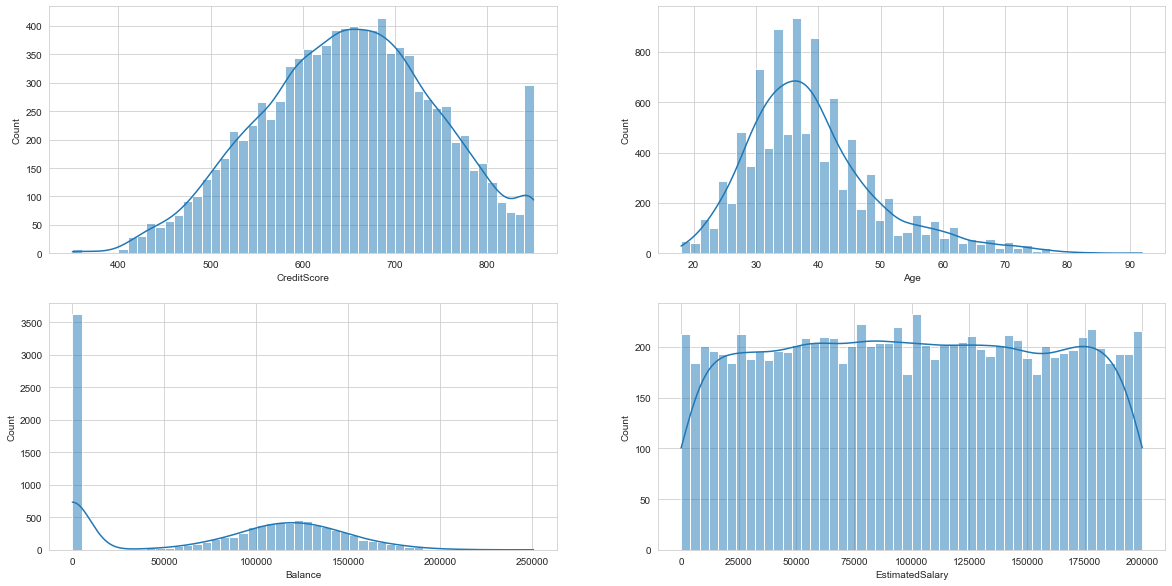

In [12]:
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
index = 0
plt.figure(figsize=(20,10))
for col in columns:    
    index += 1
    plt.subplot(2,2,index)
    sns.histplot(data=df, x=col, bins=50, kde=True)

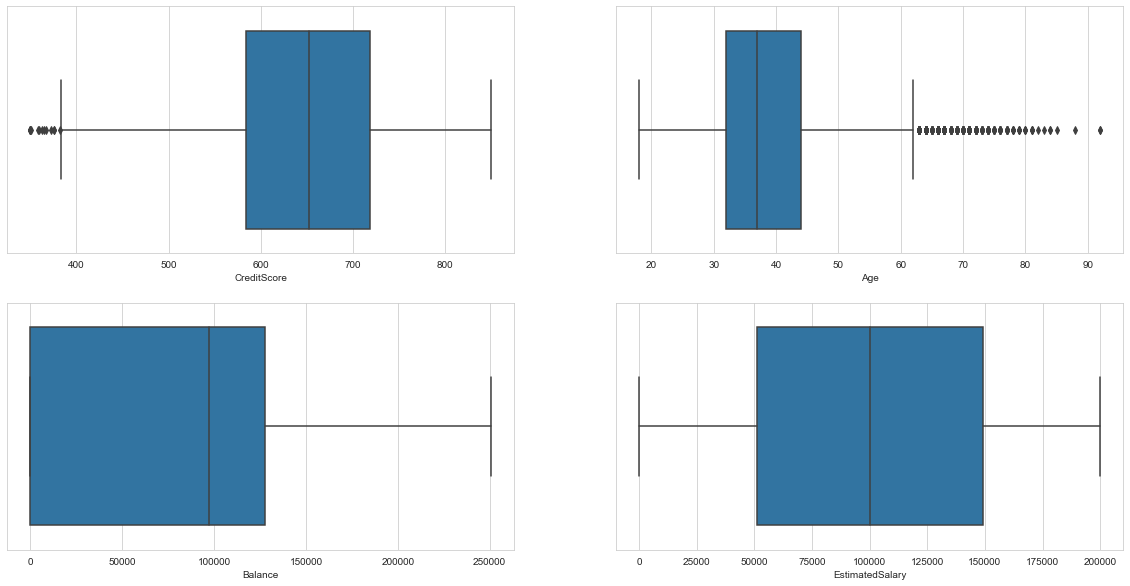

In [13]:
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
index = 0
plt.figure(figsize=(20,10))
for col in columns:    
    index += 1
    plt.subplot(2,2,index)
    sns.boxplot(data=df, x=col)

In [14]:
df.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

In [15]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [16]:
df.Balance.value_counts()

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: Balance, Length: 6382, dtype: int64

In [17]:
df.EstimatedSalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: EstimatedSalary, Length: 9999, dtype: int64

***target column***

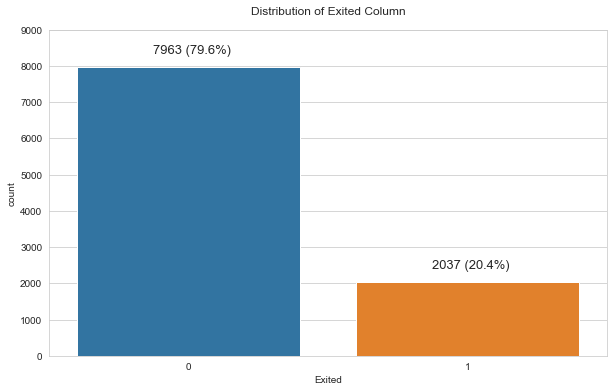

In [18]:
ax = sns.countplot(x='Exited', data=df)
for p in ax.patches:
    percentage = f'{p.get_height()} ({100 * p.get_height() / len(df):.1f}%)\n'
    ax.annotate(percentage, (p.get_x()+0.27, p.get_height()-3), fontsize=13)
ax.set_title('Distribution of Exited Column', pad=15)
ax.set_ylim(0, 9000);  

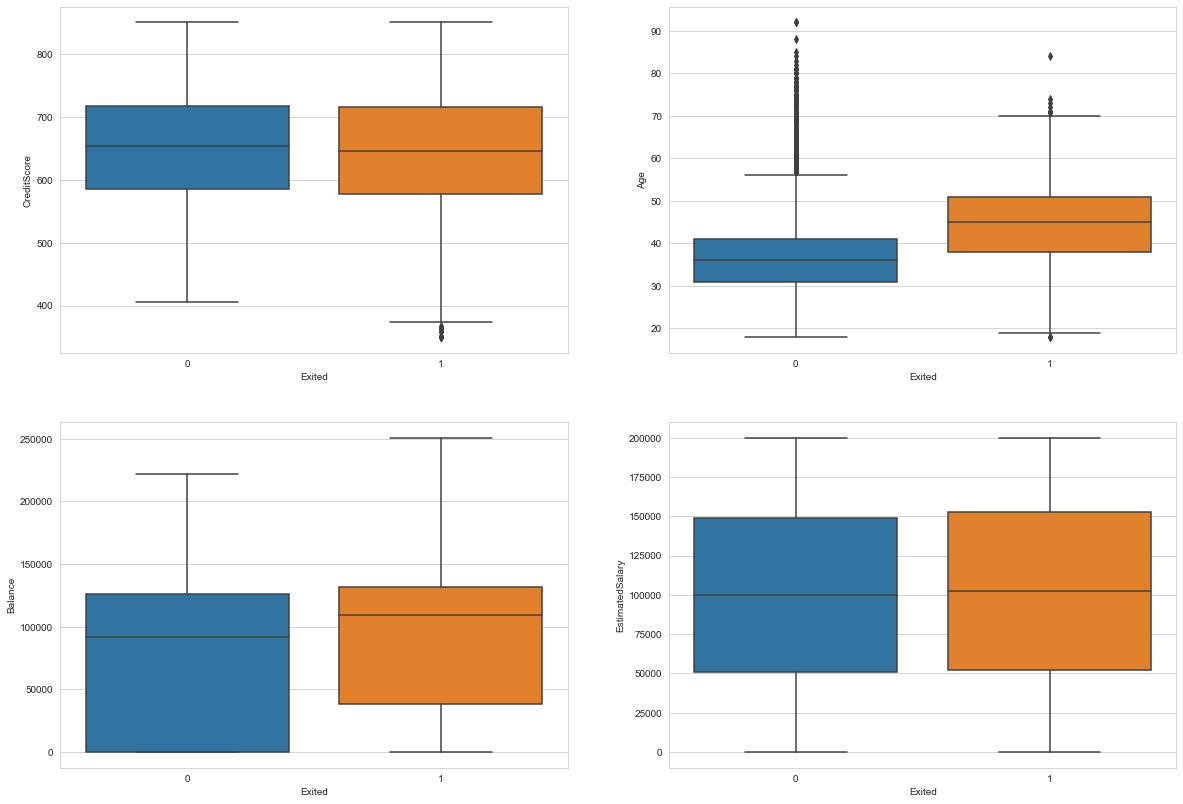

In [19]:
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
index = 0
plt.figure(figsize=(20,14))
for col in columns:    
    index += 1
    plt.subplot(2,2,index)
    sns.boxplot(data=df, x='Exited', y=col)

***correlations - patterns***

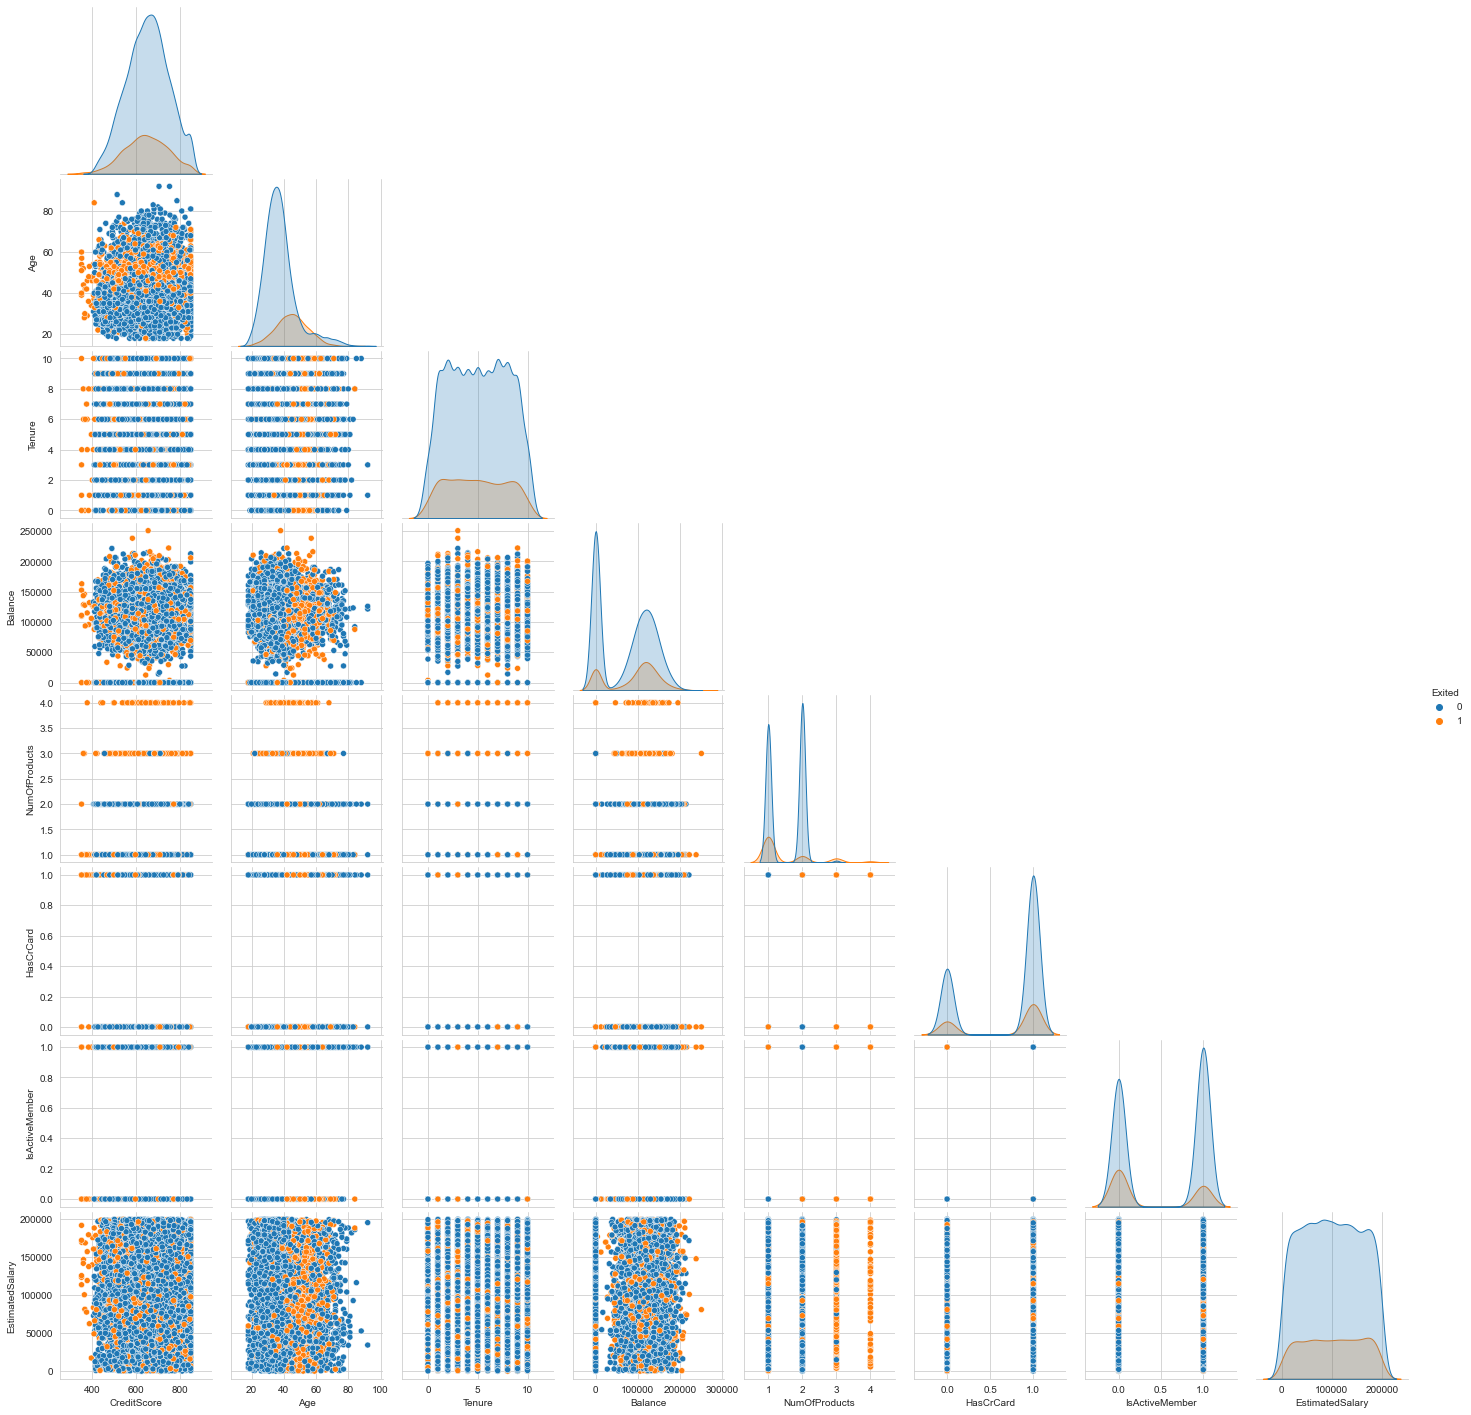

In [20]:
sns.pairplot(df, hue='Exited', corner=True)

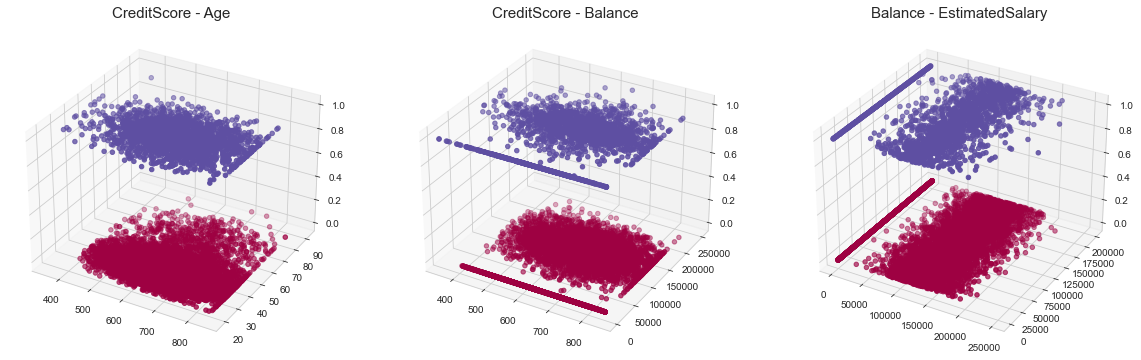

In [21]:
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(20,10))
color_map = plt.get_cmap('Spectral')

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df['CreditScore'], df['Age'], df['Exited'], c=df['Exited'], cmap = color_map)
ax1.set_title('CreditScore - Age', fontsize=15)

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df['CreditScore'], df['Balance'], df['Exited'], c=df['Exited'], cmap = color_map)
ax2.set_title('CreditScore - Balance', fontsize=15)

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df['Balance'], df['EstimatedSalary'], df['Exited'], c=df['Exited'], cmap = color_map)
ax3.set_title('Balance - EstimatedSalary', fontsize=15);

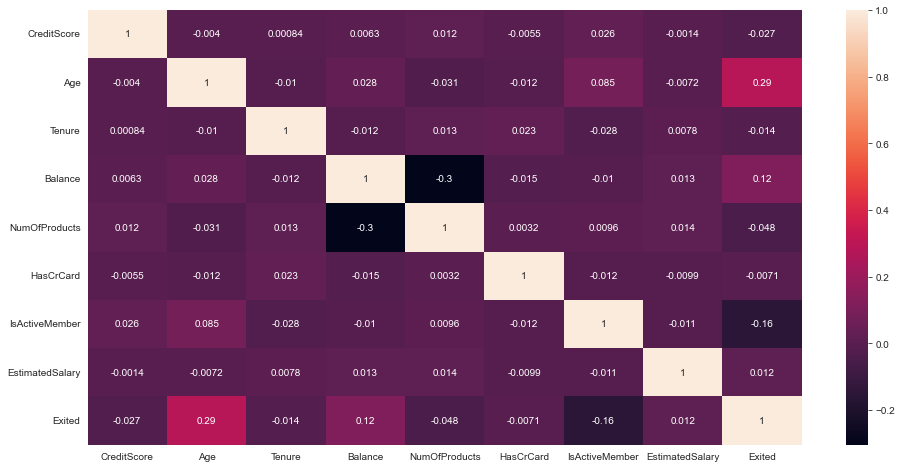

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:>

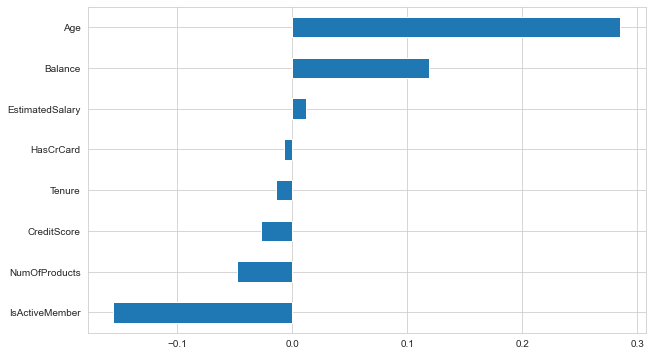

In [23]:
df.corr()['Exited'].drop('Exited').sort_values().plot.barh()
# df.corr()['Exited'][:-1].sort_values().plot.barh()

***

In [24]:
df=pd.get_dummies(df, drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9997,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9998,709,36,7,0.000,1,0,1,42085.580,1,0,0,0


In [25]:
df.shape, df.size

((10000, 12), 120000)

## Preprocessing of Data
- Train | Test Split, Scaling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [28]:
seed=42

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8000, 11)
Train target shape   :  (8000,)
Test features shape  :  (2000, 11)
Test target shape    :  (2000,)


## Modeling & Model Performance

### Import related libraries

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [34]:
print(tf.__version__)

2.8.0


### Creating Model

### without class_weigth

In [35]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # recall = TP / TP +FN

early_stop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=15)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=250, verbose=1,
          callbacks=[early_stop])

Epoch 1/250
225/225 [==============================] - 2s 3ms/step - loss: 0.5440 - recall: 0.0284 - val_loss: 0.4696 - val_recall: 0.0000e+00
Epoch 2/250
225/225 [==============================] - 0s 2ms/step - loss: 0.4816 - recall: 0.0000e+00 - val_loss: 0.4550 - val_recall: 0.0000e+00
Epoch 3/250
225/225 [==============================] - 0s 2ms/step - loss: 0.4683 - recall: 0.0000e+00 - val_loss: 0.4447 - val_recall: 0.0000e+00
Epoch 4/250
225/225 [==============================] - 0s 2ms/step - loss: 0.4542 - recall: 0.0514 - val_loss: 0.4316 - val_recall: 0.0789
Epoch 5/250
225/225 [==============================] - 0s 2ms/step - loss: 0.4365 - recall: 0.1779 - val_loss: 0.4121 - val_recall: 0.1711
Epoch 6/250
225/225 [==============================] - 1s 2ms/step - loss: 0.4209 - recall: 0.2280 - val_loss: 0.3968 - val_recall: 0.2105
Epoch 7/250
225/225 [==============================] - 0s 2ms/step - loss: 0.4075 - recall: 0.2740 - val_loss: 0.3835 - val_recall: 0.2434
Epoch 8

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.544,0.028,0.470,0.000
1,0.482,0.000,0.455,0.000
2,0.468,0.000,0.445,0.000
3,0.454,0.051,0.432,0.079
4,0.436,0.178,0.412,0.171


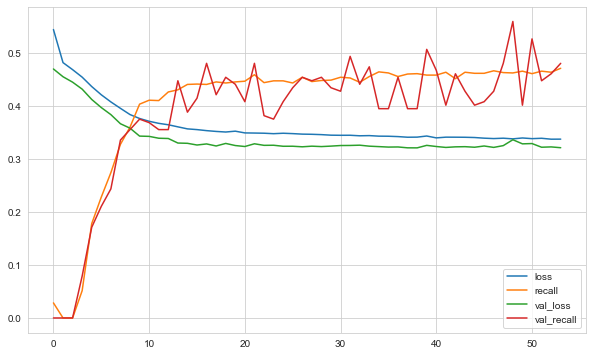

In [39]:
loss_df.plot();

#### Evaluate

In [40]:
model.evaluate(X_test, y_test, verbose=0)

[0.34186655282974243, 0.49631449580192566]

In [41]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.34186655282974243
recall :  0.49631449580192566


In [42]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1528   65]
 [ 205  202]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



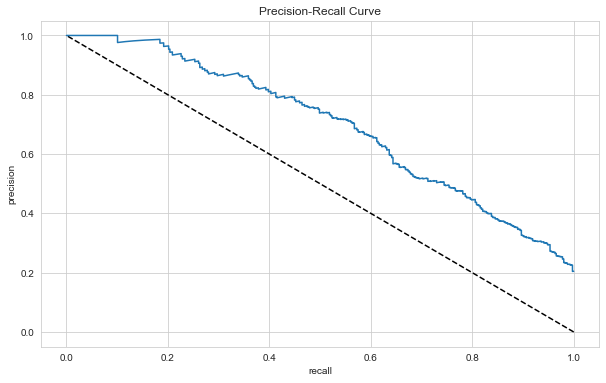

In [43]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.show() 

In [44]:
average_precision_score(y_test, y_pred_proba)

0.6965488411032849

### with class_weigth

In [45]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [46]:
tf.random.set_seed(seed)

model_2 = Sequential()

model_2.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

early_stop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=15)

In [47]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                192       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_2.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=250, verbose=1,
            callbacks=[early_stop], class_weight=class_weights)

Epoch 1/250
225/225 [==============================] - 2s 3ms/step - loss: 0.6907 - recall: 0.5907 - val_loss: 0.6783 - val_recall: 0.7237
Epoch 2/250
225/225 [==============================] - 0s 2ms/step - loss: 0.6457 - recall: 0.6191 - val_loss: 0.6159 - val_recall: 0.6513
Epoch 3/250
225/225 [==============================] - 0s 2ms/step - loss: 0.6129 - recall: 0.6488 - val_loss: 0.6181 - val_recall: 0.6974
Epoch 4/250
225/225 [==============================] - 0s 2ms/step - loss: 0.5915 - recall: 0.6881 - val_loss: 0.5048 - val_recall: 0.5263
Epoch 5/250
225/225 [==============================] - 0s 2ms/step - loss: 0.5778 - recall: 0.6888 - val_loss: 0.5362 - val_recall: 0.6711
Epoch 6/250
225/225 [==============================] - 0s 2ms/step - loss: 0.5654 - recall: 0.7050 - val_loss: 0.5428 - val_recall: 0.7039
Epoch 7/250
225/225 [==============================] - 0s 2ms/step - loss: 0.5535 - recall: 0.7057 - val_loss: 0.5102 - val_recall: 0.6776
Epoch 8/250
225/225 [======

In [49]:
loss_df2 = pd.DataFrame(model_2.history.history)
loss_df2.head()

,loss,recall,val_loss,val_recall
0,0.691,0.591,0.678,0.724
1,0.646,0.619,0.616,0.651
2,0.613,0.649,0.618,0.697
3,0.591,0.688,0.505,0.526
4,0.578,0.689,0.536,0.671


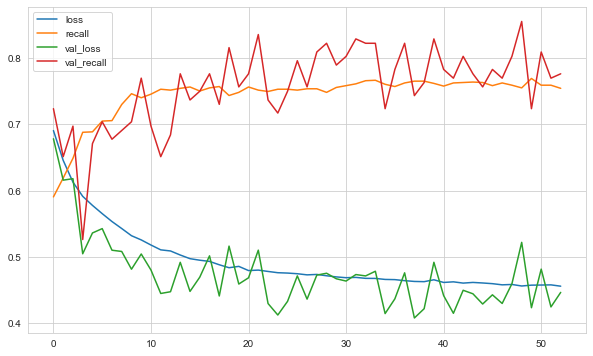

In [50]:
loss_df2.plot();

#### Evaluate

In [51]:
model_2.evaluate(X_test, y_test, verbose=0)

[0.4553016424179077, 0.7690417766571045]

In [52]:
loss, recall = model_2.evaluate(X_test, y_test, verbose=0)
print("loss   : ", loss)
print("recall : ", recall)

loss   :  0.4553016424179077
recall :  0.7690417766571045


In [53]:
y_pred = (model_2.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1261  332]
 [  94  313]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1593
           1       0.49      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.80      2000



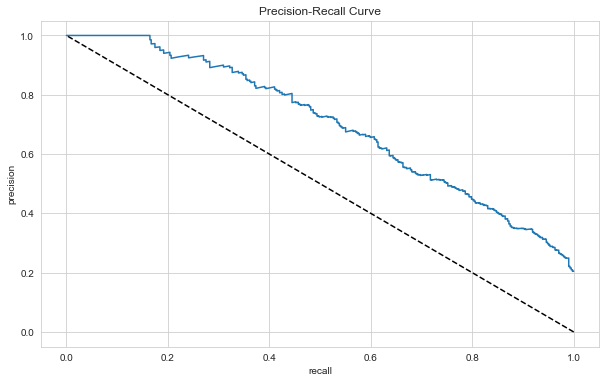

In [54]:
y_pred_proba = model_2.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.show() 

In [55]:
average_precision_score(y_test, y_pred_proba)

0.7020116865527525

## GridSearchCV

In [56]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate), loss='binary_crossentropy', metrics=['Recall'])
    return classifier

In [57]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "auto", verbose = 1, patience = 15)

In [58]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 250)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/250
225/225 [==============================] - 1s 3ms/step - loss: 0.6703 - recall: 0.4899 - val_loss: 0.5769 - val_recall: 0.5592
Epoch 2/250
225/225 [==============================] - 0s 2ms/step - loss: 0.6021 - recall: 0.6624 - val_loss: 0.5870 - val_recall: 0.7500
Epoch 3/250
225/225 [==============================] - 0s 2ms/step - loss: 0.5614 - recall: 0.6969 - val_loss: 0.5512 - val_recall: 0.7171
Epoch 4/250
225/225 [==============================] - 0s 2ms/step - loss: 0.5310 - recall: 0.7104 - val_loss: 0.4281 - val_recall: 0.5658
Epoch 5/250
225/225 [==============================] - 0s 2ms/step - loss: 0.5073 - recall: 0.7307 - val_loss: 0.4682 - val_recall: 0.6645
Epoch 6/250
225/225 [==============================] - 0s 2ms/step - loss: 0.4983 - recall: 0.7246 - val_loss: 0.4686 - val_recall: 0.7500
Epoch 7/250
225/225 [==============================] - 0s 2ms/step - loss: 0.4908 - recall: 0.7226 - va

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002747B6F3FA0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [59]:
grid_model.best_score_

0.7590570548710096

In [60]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [61]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.746,0.060,6,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.709,0.052,18,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
2,0.467,0.335,21,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.734,0.047,11,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.759,0.052,1,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.747,0.066,5,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
6,0.506,0.330,19,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.745,0.039,7,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.732,0.053,14,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.732,0.069,15,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


#### Evaluate

In [63]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1270  323]
 [ 108  299]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



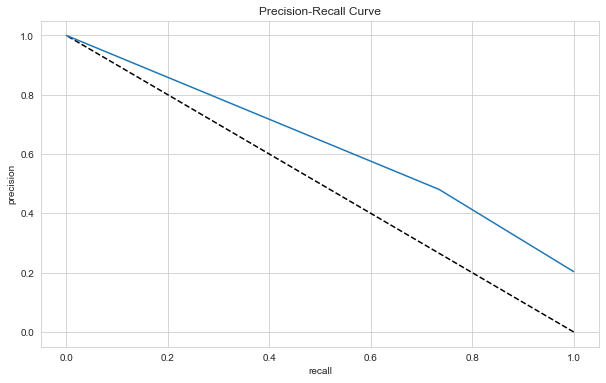

In [64]:
y_pred_proba = grid_model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.show()  

In [65]:
average_precision_score(y_test, y_pred_proba)

0.4071486762998017

## Final Model and Model Deployment

In [66]:
import pickle
pickle.dump(scaler, open('scaler_churn', 'wb'))

In [67]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

early_stop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=15)

In [68]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=32, epochs=250, verbose=1,
            callbacks=[early_stop], class_weight=class_weights)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.6875 - recall: 0.6448 - val_loss: 0.6709 - val_recall: 0.6290
Epoch 2/250
250/250 [==============================] - 1s 2ms/step - loss: 0.6355 - recall: 0.6387 - val_loss: 0.6465 - val_recall: 0.6855
Epoch 3/250
250/250 [==============================] - 1s 2ms/step - loss: 0.5992 - recall: 0.6730 - val_loss: 0.5800 - val_recall: 0.6708
Epoch 4/250
250/250 [==============================] - 1s 2ms/step - loss: 0.5793 - recall: 0.6926 - val_loss: 0.5689 - val_recall: 0.7002
Epoch 5/250
250/250 [==============================] - 1s 2ms/step - loss: 0.5630 - recall: 0.6933 - val_loss: 0.5694 - val_recall: 0.7420
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.5495 - recall: 0.7166 - val_loss: 0.5853 - val_recall: 0.7666
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.5378 - recall: 0.7344 - val_loss: 0.5455 - val_recall: 0.7641
Epoch 8/250
250/250 [======

250/250 [==============================] - 1s 2ms/step - loss: 0.4514 - recall: 0.7601 - val_loss: 0.4062 - val_recall: 0.6830
Epoch 60/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4518 - recall: 0.7564 - val_loss: 0.5344 - val_recall: 0.8256
Epoch 61/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4512 - recall: 0.7638 - val_loss: 0.5106 - val_recall: 0.8157
Epoch 62/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4511 - recall: 0.7669 - val_loss: 0.4291 - val_recall: 0.7174
Epoch 63/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4514 - recall: 0.7699 - val_loss: 0.3902 - val_recall: 0.6781
Epoch 64/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4508 - recall: 0.7558 - val_loss: 0.4286 - val_recall: 0.7346
Epoch 65/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4502 - recall: 0.7675 - val_loss: 0.4217 - val_recall: 0.7248
Epoch 66/250
250/250 [===========

<AxesSubplot:>

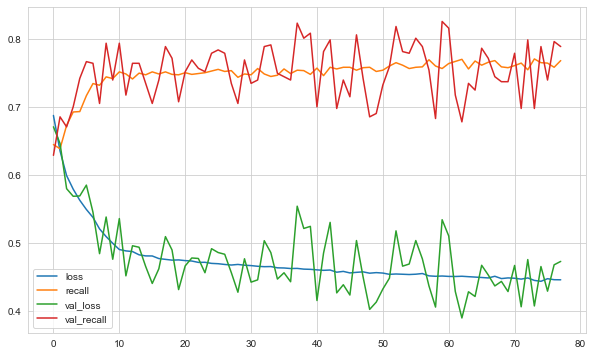

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [70]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss     : ", loss)
print("recall : ", recall)

loss     :  0.4732294976711273
recall :  0.7886977791786194


In [71]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1225  368]
 [  86  321]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.47      0.79      0.59       407

    accuracy                           0.77      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.77      0.79      2000



In [72]:
model.save('model_churn.h5')

### Prediction

In [73]:
from tensorflow.keras.models import load_model

In [74]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [75]:
sample_custs = df.drop('Exited', axis = 1).iloc[0:5, :]
sample_custs

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,1,0


In [76]:
sample_custs = scaler_churn.transform(sample_custs)
sample_custs

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , 0.35156138, 0.        ,
        0.        , 1.        , 0.56270874, 0.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , 0.66975307, 0.66666667,
        1.        , 0.        , 0.56965435, 0.        , 0.        ,
        0.        ],
       [0.698     , 0.28378378, 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005, 0.        , 0.        ,
        0.        ],
       [1.        , 0.33783784, 0.2       , 0.52649903, 0.        ,
        1.        , 1.        , 0.39540036, 0.        , 1.        ,
        0.        ]])

In [77]:
(model_churn.predict(sample_custs) > 0.5).astype("int32")

array([[1],
       [1],
       [1],
       [0],
       [0]])

In [78]:
df["Exited"].iloc[0:5]

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

***

## Comparison with ML

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1137  456]
 [ 122  285]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1540   53]
 [ 221  186]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___